In [3]:
# Importing the necessary libraries for my project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [29]:
# Readin the dataset
data=pd.read_csv("diabetes.csv")

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there few data for columns Glucose, Insulin,Skin thickness ,BMI, and Blood Pressure which hava value as 0. Thats not possible right.We can replace it with their respective mean values.

In [30]:
data["Glucose"].astype("float")

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [31]:
#Here few misconception is ther like BMI can not be zero, BP can't be zero,glucose,insuline can'tbe zero so lets fix it by replacing zero values with the mean of the column

data["BMI"]=data["BMI"].replace(0,data["BMI"].mean())
data["BloodPressure"]=data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())
data["Insulin"]=data["Insulin"].replace(0,data["Insulin"].mean())
data["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].mean())

<Axes: >

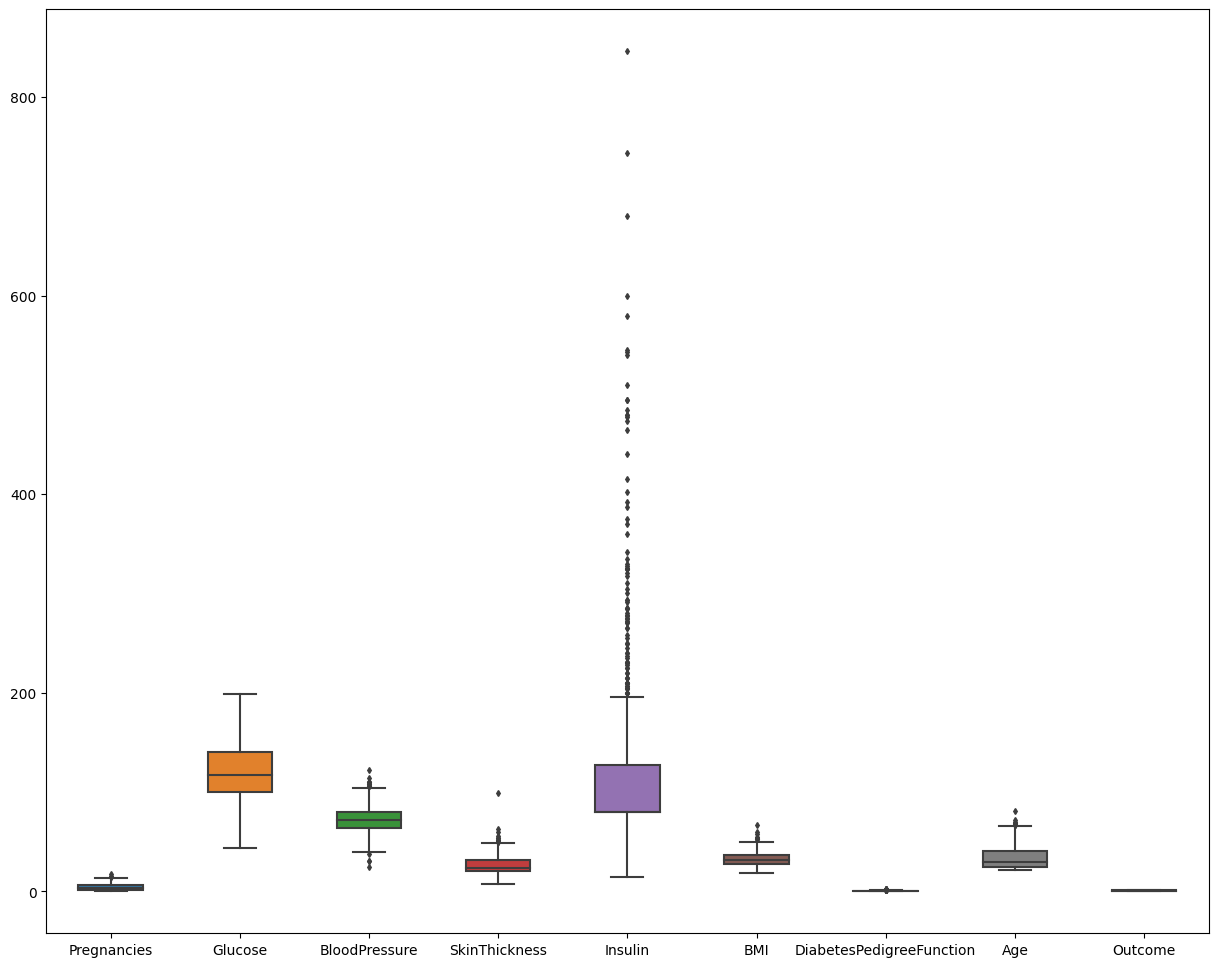

In [48]:
#Now we have to check is there any outlier present in the data set or not
fig,axis=plt.subplots(figsize=(15,12))
sns.boxplot(data=data,width=0.5,ax=axis,fliersize=3)

In [49]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [51]:
x=data.drop(columns=["Outcome"])
y=data["Outcome"]

In [52]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


In [58]:
# Appying Train test split on the data set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [59]:
x_train.shape,y_train.shape

((576, 8), (576,))

In [60]:
import pickle

def scaler_standard(x_train,x_test):
 # Standard Scaling 
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.transform(x_test)
    
    #Saving the data
    file=open("StandarScaler.pkl","wb")
    pickle.dump(scaler,file)
    file.close()
    
    return x_train_scaled,x_test_scaled



In [61]:
x_train_scaled,x_test_scaled=scaler_standard(x_train,x_test)

In [62]:
x_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [66]:
log_reg=LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [68]:
# Hyperparameter Tuning
#GridSearch CV
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
#Parameter Grid
parameters={
    
    "penalty":["l1","l2"],
    "C":np.logspace(-3,3,7),
    "solver":["newton-cg","lbfgs","liblinear"]
}

In [74]:
logreg=LogisticRegression()
clf=GridSearchCV(logreg,         #Model
                param_grid=parameters,   #Hyperparameters
                scoring="accuracy",  #metric for scoring,
                cv=10 )# number of folds
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [75]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

In [76]:
clf.best_score_

0.763793103448276

## Seeing the perfromance of the data set


In [78]:
y_pred=clf.predict(x_test_scaled)

In [79]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [80]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [81]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.796875

In [82]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9

In [83]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8181818181818182

In [84]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8571428571428572

In [85]:
import pickle
file = open('modelForPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()